In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat
from sklearn.metrics import classification_report#这个包是评价报告
data = loadmat('D:\\ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [2]:
data['X'].shape,data['y'].shape

((5000, 400), (5000, 1))

In [3]:
sample_idx=np.random.choice(np.arange(data['X'].shape[0]),100)
print(sample_idx)

[4803 2265 3561   90 3853 2380 4503 1405 2104 4575 1433  671 2314 2457
  609 3258 1886 2690 4606 3098 3550 2338 3989 3889 3964 1624 3258  794
 3932  952 3879 2299 3866 4245 2236 1164 1027 4676 4493 1841 2022 4400
 4218  445 2568 2207  701 3275 4510  241 1721  390  768 1728 3837 3149
 2650 3477 4112 2109 4090 4796  513 2707 2133  249 2687 2080 2355 1295
 1241 3176 3144 1129 3533 1151 1757 1066  520 1380 2213 1954 1217 2328
 4731   83 3214   87 2752 1194 3727 2083   59 3442   55 4423  826 2860
 2045 1767]


In [4]:
sample_images=data['X'][sample_idx,:]
sample_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
sample_images.shape

(100, 400)

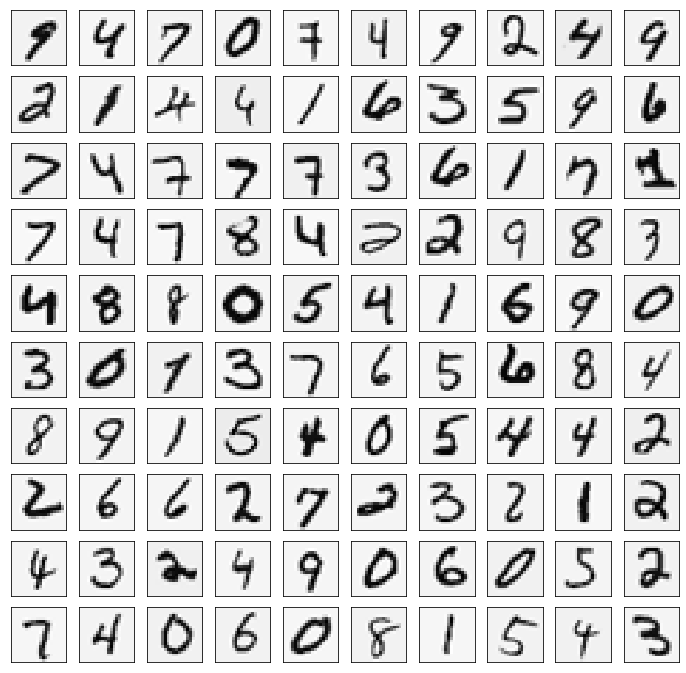

In [13]:
fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(12, 12))
for r in range(10):
    for c in range(10):
        ax_array[r, c].matshow(np.array(sample_images[10 * r + c].reshape((20, 20))).T,cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([])) 

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def cost(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / len(X) + reg
def gradient(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    error = sigmoid(X * theta.T) - y
    
    grad = ((X.T * error) / len(X)).T + ((learningRate / len(X)) * theta)
    
    # intercept gradient is not regularized
    grad[0, 0] = np.sum(np.multiply(error, X[:,0])) / len(X)
    
    return np.array(grad).ravel()